In [2]:
import regex as re
import matplotlib.pyplot as plt
import numpy as np

INPUT_FILE_PATH = './input.txt'
#INPUT_FILE_PATH = './example_in.txt'


In [3]:

def parse_input_file():
    with open(INPUT_FILE_PATH, 'r') as f:
        lines = f.read().split("\n")
    return lines


In [86]:

def intersect(h1, h2):
    pos, vel = h1['pos'], h1['vel']
    px_1, py_1, _ = pos
    vx_1, vy_1, _ = vel
    pos, vel = h2['pos'], h2['vel']
    px_2, py_2, _ = pos
    vx_2, vy_2, _ = vel
    
    b1 = py_1-(vy_1*px_1/vx_1)
    b2 = py_2-(vy_2*px_2/vx_2)

    if(vx_1 != 0 and vx_2 != 0):
        a1 = vy_1/vx_1
        a2 = vy_2/vx_2
    else:
        print("ERROR ONE OF THE VELOCITY IS 0")
    if(a1==a2):
        if(b1 != b2):
#            print(f"collinear not on the same line")
            return(False, 0,0,0,0)
        
        else:
            if(vx_1 != vx_2):
                t = (px_1-px_2)/(vx_2 - vx_1)
            elif(vy_1 != vy_2):
                t = (py_1-py_2)/(vy_2 - vy_1)
            else: t = -np.inf
            if(t> 0):
                print(f"collinear but will cross at t = {t}")
                x = px_1 + vx_1 * t
                y = py_1 + vy_1 * t
                return(True, x, y, t, t)

            elif(t==0):
                print("Those are the same hails !? ")
            else:
                print(f"collinear but the higher snowflake will never catch up")
                return(False, 0,0,0,0)
    
    x  = (b2-b1) / (a1 - a2)
    y = a1 * x + b1
    t1 = (x-px_1)/vx_1
    t2 = (x-px_2)/vx_2
    return(True, x,y,t1, t2)



def isinbound(x,y, minbound, maxbound):
    if(not (minbound < x < maxbound)):
        return(False)
    elif(not (minbound < y < maxbound)):
        return(False)
    else:
        return(True)

        
def findall_potential_intersect(all_hail, minbound, maxbound):
    cross_dict = {}
    for i,h1 in enumerate(all_hail):
        for j,h2 in enumerate(all_hail[:]):
            if(h1 != h2):#cross, x, y, t
                cross, x, y, t1, t2 = intersect(h1, h2)    
                if(cross and t1>0 and t2>0 and isinbound(x,y, minbound, maxbound)):
                    cross_dict[(i,j)] = {'x':x, 'y':y, 't1':t1, 't2':t2}
    return(cross_dict)
    
def count_crossing_paths(cross_dict, minbound, maxbound):
    collision_count = 0
    already_counted = []
    for k, v in cross_dict.items():
        i, j = k
        x,y, t1,t2 = v.values()
        if((i,j) not in already_counted):
            if(isinbound(int(x),int(y), minbound, maxbound) and t1>0 and t2>0):
                collision_count += 1
                already_counted.append((j,i))
    return(collision_count)

def remove_collisions(potential_collisions):
    collisions = [(k,v) for k,v in potential_collisions.items() if v['t1']==v['t2']]
    for col in collisions:
        i, j = col[0]
        t = col[1]['t1']
        for j in range(len(lines)):
            if( (i,j) in potential_collisions.keys()):
                res = potential_collisions[(i,j)]
                if(res['t1']>t):
                    potential_collisions.pop((i,j))
    return(potential_collisions)
    

def parse_hail(lines):
    all_hail = []
    for l in lines:
        pos, vel = l.split("@")
        pos = pos.split(",")
        pos = [int(x) for x in pos]
        vel = vel.split(",")
        vel = [int(x) for x in vel]
        all_hail.append({"pos":pos, "vel":vel})
    return(all_hail)

In [95]:

INPUT_FILE_PATH = './example_in.txt'
#INPUT_FILE_PATH = './input.txt'
lines = parse_input_file()
all_hail = parse_hail(lines)
all_hail

[{'pos': [19, 13, 30], 'vel': [-2, 1, -2]},
 {'pos': [18, 19, 22], 'vel': [-1, -1, -2]},
 {'pos': [20, 25, 34], 'vel': [-2, -2, -4]},
 {'pos': [12, 31, 28], 'vel': [-1, -2, -1]},
 {'pos': [20, 19, 15], 'vel': [1, -5, -3]}]

In [185]:

INPUT_FILE_PATH = './example_in.txt'
lines = parse_input_file()
all_hail = parse_hail(lines)

minbound, maxbound = 7,27
potential_collisions = findall_potential_intersect(all_hail, minbound, maxbound)
cross_dict = remove_collisions(potential_collisions)
n_collisions = count_crossing_paths(potential_collisions, minbound, maxbound)


print(f"\n   PART 1 Solution: there are {n_collisions} collisions !")


   PART 1 Solution: there are 2 collisions !


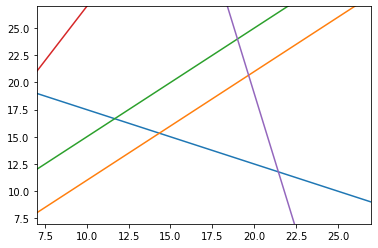

In [186]:
minbound, maxbound = 7, 27
x_plot = np.linspace(minbound, maxbound, 3)

for i,h in enumerate(all_hail):
    #print(h)
   # get_hail_path(h)
    pos, vel = h['pos'], h['vel']
    px, py, _ = pos
    vx, vy, _ = vel
    eq = lambda x: py + vy * (x-px)/vx
    eq = lambda x: py-(vy*px/vx) +(vy/vx * x)

    #y = (vy/vx * x) - (vy*px/vx)+py
    y_plot = [eq(x) for x in x_plot]
    plt.plot(x_plot, y_plot, label = f"POS:{i}")#,  y = { py} + {vy} * x-{px}/{vx}")

    plt.ylim(minbound, maxbound)
    plt.xlim(minbound, maxbound)

# Part 2

In [187]:
def update_pos(h):
    pos, vel = h['pos'], h['vel']
    px, py, pz = pos
    vx, vy, vz = vel
    h['pos'] = [px + vx, py + vy, pz + vz]
    return(h)


(19, 13, 30) (17, 14, 28)
(18, 19, 22) (17, 18, 20)
(20, 25, 34) (18, 23, 30)
(12, 31, 28) (11, 29, 27)
(20, 19, 15) (21, 14, 12)


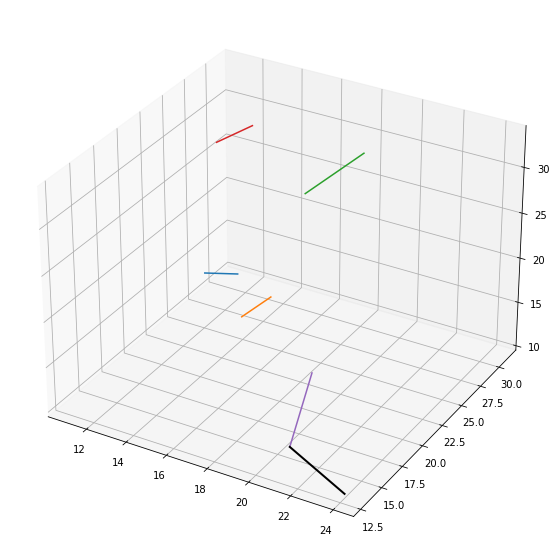

In [205]:
%matplotlib inline
minbound, maxbound = 7, 27
x_plot = np.linspace(minbound, maxbound, 3)

fig = plt.figure(figsize=[20,10])
ax = fig.add_subplot(111, projection='3d')

t=1

for i,h in enumerate(all_hail):
    #print(h)
   # get_hail_path(h)
    pos, vel = h['pos'], h['vel']
    px, py, pz = pos
    vx, vy, vz = vel

    x0 ,y0 ,z0  = px, py, pz
    xi, yi, zi = px + (vx*t), py + (vy*t), pz + (vz*t)
    print((x0, y0, z0),(xi, yi, zi))
    ax.plot([x0, xi], [y0, yi],[z0, zi])

rock = {"pos":[24,13,10], "vel":[-3,1,2]}

pos, vel = h['pos'], h['vel']
px, py, pz = [24,13,10]
vx, vy, vz = [-3,1,2]
x0 ,y0 ,z0  = px, py, pz
xi, yi, zi = px + (vx*t), py + (vy*t), pz + (vz*t)
ax.plot([x0, xi], [y0, yi],[z0, zi], color = 'black', linewidth = 2)
    
plt.show()



In [203]:
def get_pos_from_hail(all_hail):
    return([x['pos'] for x in all_hail])
    


In [211]:
rock_px, rock_vx = 1,1
for h in all_hail:

    pos, vel = h['pos'], h['vel']
    px, py, pz = pos
    vx, vy, vz = vel
    
    rock_px-px/(vx-rock_vx) == t
    print(t)
    break

1


In [209]:
def find_possible_hits(h):

    pos, vel = h['pos'], h['vel']
    px, py, pz = pos
    vx, vy, vz = vel
    xi, yi, zi = px + (vx*t), py + (vy*t), pz + (vz*t)


    rock_px,rock_py,rock_pz = np.random.randint(0,10,3)
    rock_vx,rock_vy,rock_vz = np.random.randint(0,10,3)
    
    rock_px-px == (vx-rock_vx)*t
    rock_py-py == (vy-rock_vy)*t
    rock_pz-pz == (vz-rock_vz)*t


find_possible_hits(all_hail[0])

NameError: name 'rock_px' is not defined

In [ ]:
for h in hail:

    pos, vel = h['pos'], h['vel']
    px, py, pz = pos
    vx, vy, vz = vel
    xi, yi, zi = px + (vx*t), py + (vy*t), pz + (vz*t)

    1-px == (vx-1)*t
    rock_py-py == (vy-rock_vy)*t
    rock_pz-pz == (vz-rock_vz)*t

    rock_px == px_1 + (vx_1-rock_vx)*t_1
    rock_py == py_1 + (vy_1-rock_vy)*t_1
    rock_pz == pz_1 + (vz_1-rock_vz)*t_1
    rock_px == px_2 + (vx_2-rock_vx)*t_2
    rock_py == py_2 + (vy_2-rock_vy)*t_2
    rock_pz == pz_2 + (vz_2-rock_vz)*t_2
    
    rock_px-px_1 == (vx_1-rock_vx)*t_1
    rock_py-py_1 == (vy_1-rock_vy)*t_1
    rock_pz-pz_1 == (vz_1-rock_vz)*t_1

In [ ]:
px_1 + (vx_1-rock_vx)*t_1 == px_2 + (vx_2-rock_vx)*t_2
px_1 - px_2 + vx_1*t_1 - rock_vx*t_1 == vx_2*t_2 - rock_vx*t_2
px_1 - px_2 - (vx_2*t_2) + vx_1*t_1 ==  rock_vx*(t_1-t_2)

(px_1 - px_2 - (vx_2*t_2) + vx_1*t_1 )/(t_1-t_2) ==  rock_vx
(px_3 - px_2 - (vx_2*t_2) + vx_3*t_3 )/(t_3-t_2) ==  rock_vx
(px_3 - px_4 - (vx_4*t_4) + vx_1*t_3 )/(t_3-t_4) ==  rock_vx

In [ ]:

rock_px + (rock_vx*t), rock_py + (rock_vy*t), rock_pz + (rock_vz*t)
px + (vx*t), py + (vy*t), pz + (vz*t)

# REAL DEAL

In [206]:


INPUT_FILE_PATH = './input.txt'
lines = parse_input_file()

all_hail = parse_hail(lines)

minbound, maxbound = 200000000000000, 400000000000000
potential_collisions = findall_potential_intersect(all_hail, minbound, maxbound)
cross_dict = remove_collisions(potential_collisions)
n_collisions = count_crossing_paths(potential_collisions, minbound, maxbound)

print(f"\n   PART 1 Solution: there are {n_collisions} collisions !")


   PART 1 Solution: there are 14672 collisions !


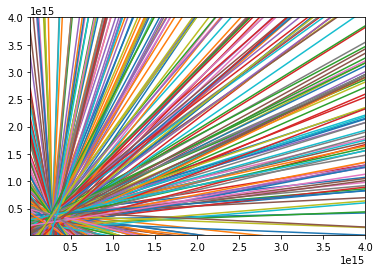

In [207]:
#minbound, maxbound = 7, 27
minbound, maxbound = 20000000000000, 4000000000000000
x_plot = np.linspace(minbound, maxbound, 3)

for i,h in enumerate(all_hail):
    #print(h)
   # get_hail_path(h)
    pos, vel = h['pos'], h['vel']
    px, py, _ = pos
    vx, vy, _ = vel
    eq = lambda x: py + vy * (x-px)/vx
    eq = lambda x: py-(vy*px/vx) +(vy/vx * x)

    #y = (vy/vx * x) - (vy*px/vx)+py
    y_plot = [eq(x) for x in x_plot]
    plt.plot(x_plot, y_plot, label = f"POS:{i}")#,  y = { py} + {vy} * x-{px}/{vx}")

    plt.ylim(minbound, maxbound)
    plt.xlim(minbound, maxbound)